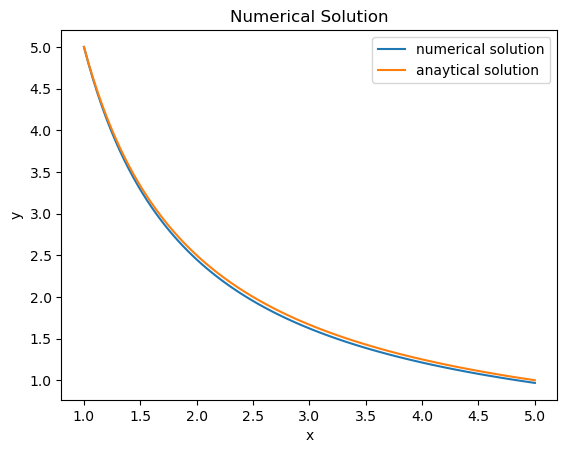

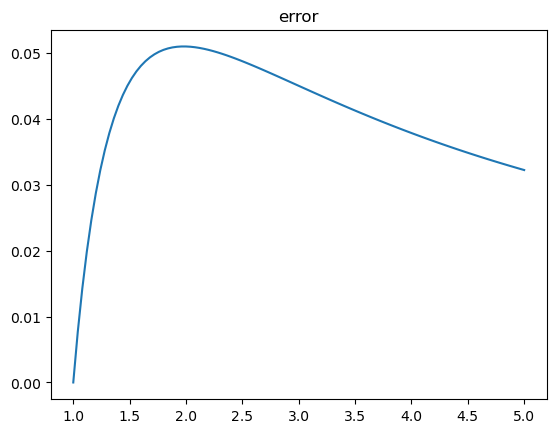

In [2]:
#question 1

import numpy as np
import matplotlib.pyplot as plt

x0,y0 = 1,5
steps = 100
xend = 5
x_values = np.linspace(x0,xend,steps+1)
y_numerical = np.zeros(steps+1)
y_numerical[0] = y0
h = (xend-x0)/steps

def yprime(x,y):
  return -y/x

for i in range(steps):
  y_numerical[i+1] = y_numerical[i] + h*(yprime(x_values[i],y_numerical[i]))

#analytical solution
y_analytical = 5/x_values

#plotting the results
plt.figure()
plt.title("Numerical Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_values,y_numerical,label='numerical solution')
plt.plot(x_values,y_analytical,label ='anaytical solution')
plt.legend()
plt.figure()
plt.plot(x_values,abs(y_numerical-y_analytical),label='error')
plt.title('error')
plt.show()

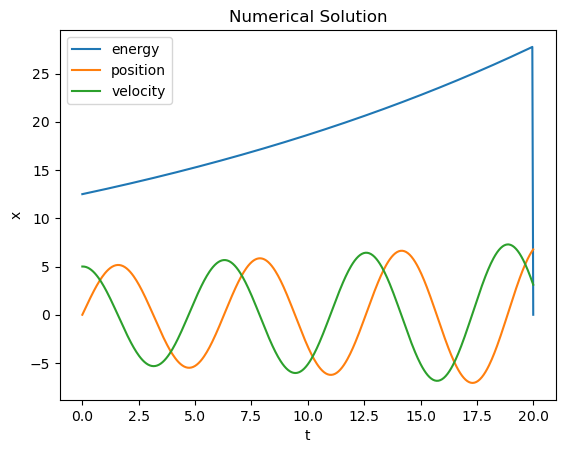

In [4]:
#question 2
#the given differential equation is x'' = (-k/m)x

import numpy as np
import matplotlib.pyplot as plt

x0,v0 = 0,5
steps = 500
t = 20
t_values = np.linspace(0,t,steps+1)
h = t/steps
k = 1
m = 1

x_numerical = np.zeros(steps+1)
v_numerical = np.zeros(steps+1)
energy = np.zeros(steps+1)
x_numerical[0] = x0
v_numerical[0] = v0

for i in range (steps):
  v_numerical[i+1] = v_numerical[i] + h*(-k/m)*x_numerical[i]
  x_numerical[i+1] = x_numerical[i] + h*v_numerical[i]
  energy[i] = 0.5*m*v_numerical[i]**2 + 0.5*k*x_numerical[i]**2

plt.figure()
plt.title("Numerical Solution")
plt.xlabel("t")
plt.ylabel("x")
plt.plot(t_values,energy,label='energy')
plt.plot(t_values,x_numerical,label='position')
plt.plot(t_values,v_numerical,label='velocity')
plt.legend()
plt.show()

#as we can see, the energy diverges


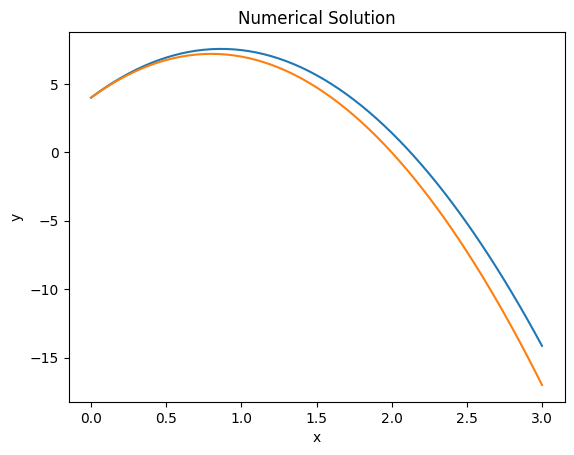

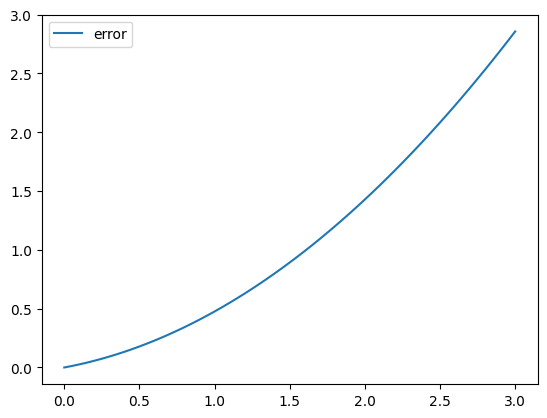

In [ ]:
#question 3

def Eul(f,x0,y0,h):
  return y0 + h * f(x0, y0)

x0 = 0
y0 = 4
h = 0.05
N = 60

x_values = np.linspace(0,3,61)
y_numerical = np.zeros(61)
y_numerical[0] = y0

for i in range(N):
    y_numerical[i+1] = Eul(lambda x, y: (2*y - 18*x) / (1 + x) , x_values[i], y_numerical[i], h)

#analytical solution
y_analytical = -5*x_values**2 + 8*x_values + 4

plt.figure()
plt.title("Numerical Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_values,y_numerical,label='numerical solution')
plt.plot(x_values,y_analytical,label ='anaytical solution')
plt.figure()
plt.plot(x_values,abs(y_numerical-y_analytical),label='error')
plt.legend()
plt.show()

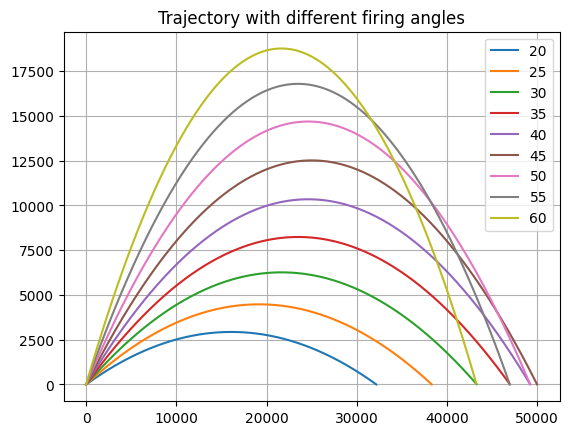

[32165.67840950187, 38318.69323590989, 43283.949681146405, 46961.98669908795, 49226.015914825846, 49992.44942988828, 49224.67514979486, 46975.910137150066, 43260.00000000001]


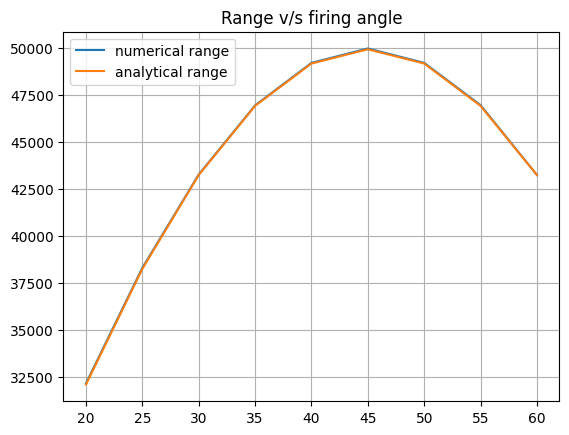

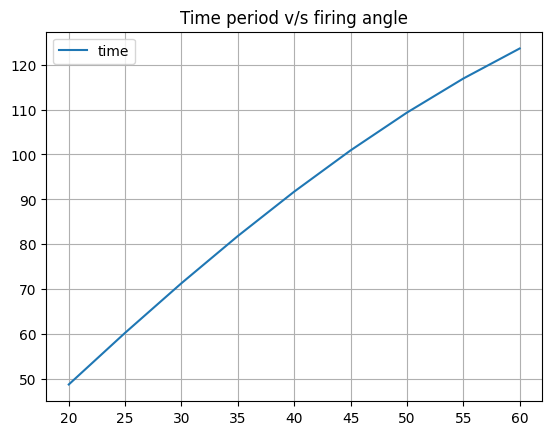

In [9]:
#question 4
g = 9.81

def projectile(v0, x0, y0, theta,h,N):
    vx = v0*np.cos(np.radians(theta))
    vy = v0*np.sin(np.radians(theta))
    x = x0
    y = y0
    X = []
    Y = []
    for i in range(N):
        X.append(x)
        Y.append(y)
        x = x + vx*h
        y = y + vy*h
        vy = vy - g*h
        if y < 0:
            break
    return X,Y


def Range(theeta,v0):
    return (v0*v0*np.sin(2*np.radians(theeta)))/g
def Time(theeta,v0):
    return (2*v0*np.sin(np.radians(theeta)))/g

R = []
plt.figure()
for theta in range(20,65,5):
    X,Y = projectile(700,0,0,theta,0.1,10000)
    plt.plot(X,Y,label=theta)
    R.append(X[-1])

plt.title('Trajectory with different firing angles')
plt.grid()
plt.legend()
plt.show()
print(R)

theta1 = np.arange(20,65,5)
plt.figure()
plt.title('Range v/s firing angle')
plt.plot(theta1,R,label="numerical range")
plt.plot(theta1,Range(theta1,700),label="analytical range")
plt.legend()
plt.grid()
plt.show()


plt.figure()
plt.title('Time period v/s firing angle')
plt.plot(theta1,Time(theta1,700),label="time")
plt.legend()
plt.grid()
plt.show()

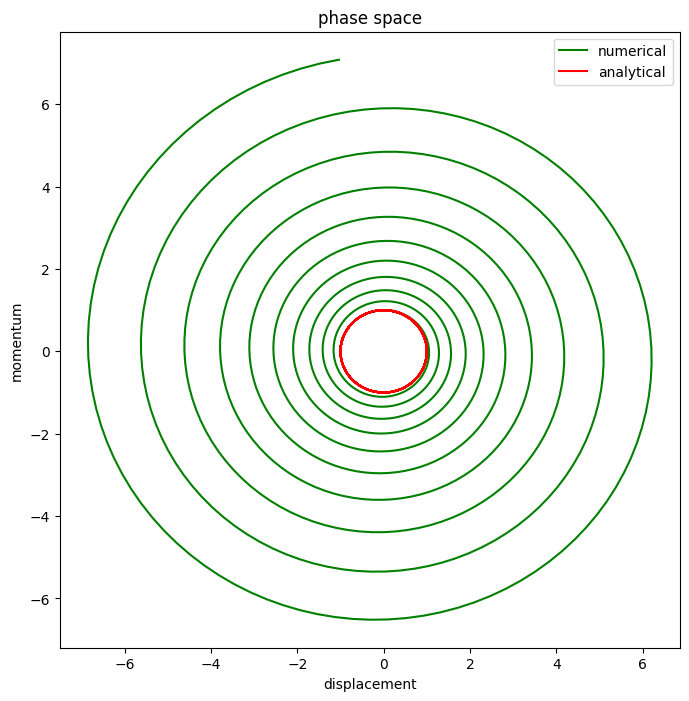

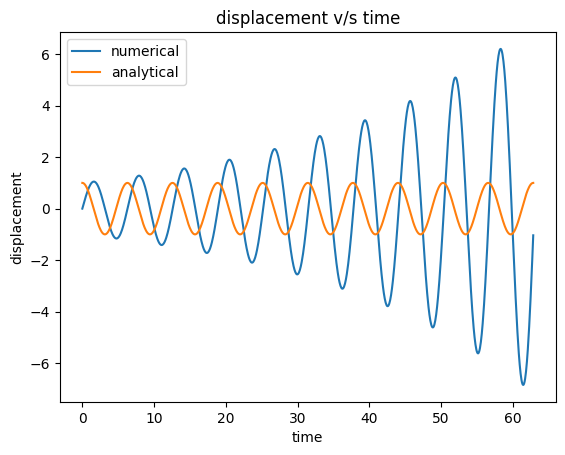

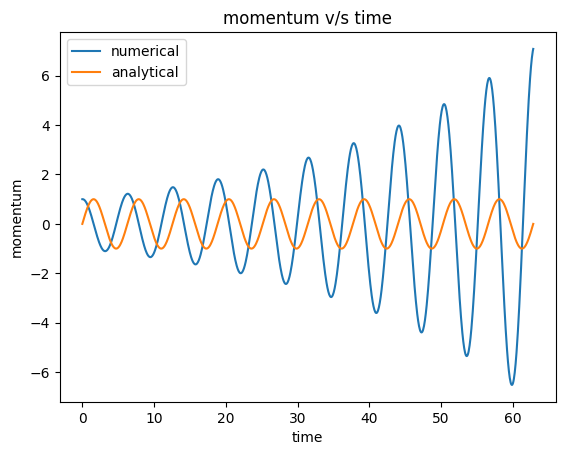

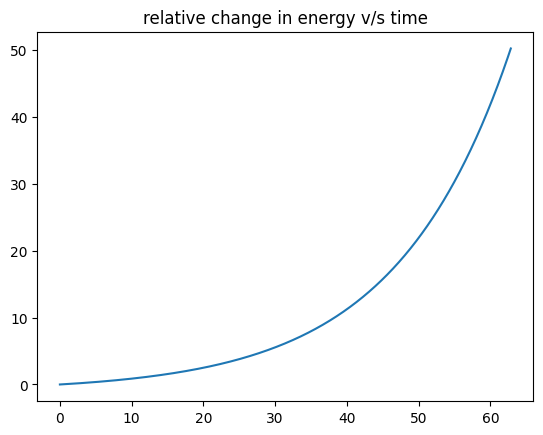

In [1]:
#question 5

import numpy as np
import matplotlib.pyplot as plt

t0,v0,x0 = 0,1,0
k,m = 1,1
T = 2*np.pi*np.sqrt(k/m)
t1 = 10*T
n = 1000
h = (t1 - t0)/n
acc=lambda x:-k*x/m
t=np.linspace(t0,t1,n)

def Eul(acc,x0,v0,t0,t1,h,n):
    t=np.linspace(t0,t1,n) #creating the time array
    v = np.zeros(n)
    x = np.zeros(n)
    v[0] = v0
    x[0] = x0
    for i in range(n-1):
        v[i+1] = v[i] + (-(x[i])*h)
        x[i+1] = x[i] + (v[i]*h)

    xsquare = []
    vsquare = []
    E = []
    for i in range(len(x)):
        xsquare.append(x[i]**2)
        vsquare.append(v[i]**2)
    for i in range(len(x)):
        E.append(0.5*(xsquare[i]+vsquare[i]))
    return np.array([m*v,x,t,E])

def analytical(acc,x0,v0,t0,t1,h,n):
    t=np.linspace(t0,t1,n)
    w=1
    x=np.cos(w*t)
    v=w*np.sin(w*t)
    return [m*v,x]

E0 = 0.5

plt.figure(figsize=(8,8))
plt.title('phase space')
plt.plot(Eul(acc,x0,v0,t0,t1,h,n)[1],Eul(acc,x0,v0,t0,t1,h,n)[0],label='numerical',color='g')
plt.plot(analytical(acc,x0,v0,t0,t1,h,n)[1],analytical(acc,x0,v0,t0,t1,h,n)[0],label='analytical',color='red')
plt.xlabel('displacement')
plt.ylabel('momentum')
plt.legend()
plt.show()

plt.figure()
plt.title('displacement v/s time')
plt.plot(t,Eul(acc,x0,v0,t0,t1,h,n)[1],label='numerical')
plt.plot(t,analytical(acc,x0,v0,t0,t1,h,n)[1],label='analytical')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend()
plt.show()

plt.figure()
plt.title('momentum v/s time')
plt.plot(t,Eul(acc,x0,v0,t0,t1,h,n)[0],label='numerical')
plt.plot(t,analytical(acc,x0,v0,t0,t1,h,n)[0],label='analytical')
plt.xlabel('time')
plt.ylabel('momentum')
plt.legend()
plt.show()

plt.figure()
plt.title('relative change in energy v/s time')
plt.plot(t,abs((E0 - Eul(acc,x0,v0,t0,t1,h,n)[3])/E0))
plt.show()

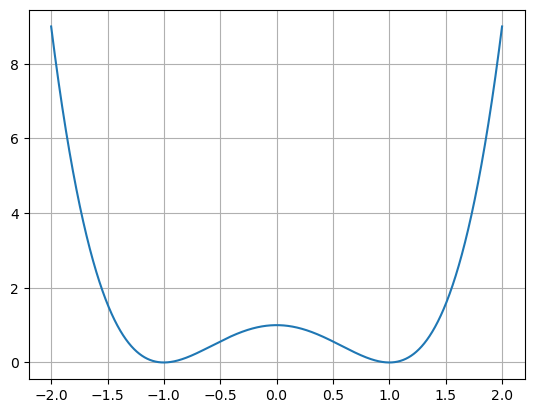

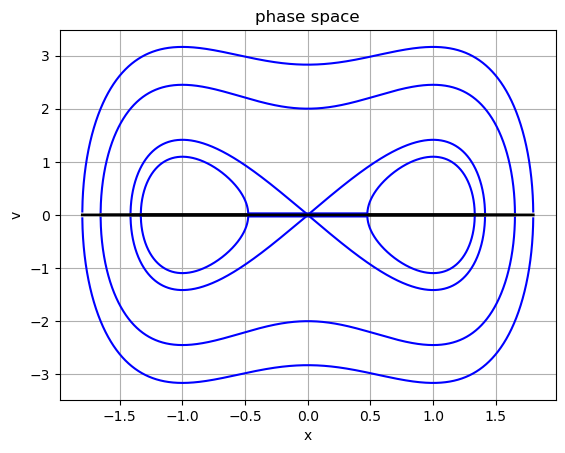

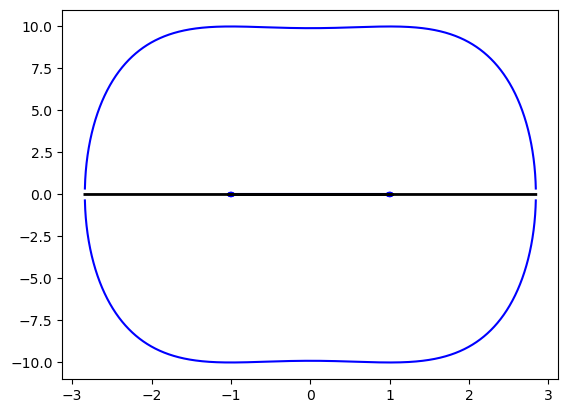

In [4]:
#question 6 plotting the phase space
import matplotlib.pyplot as plt
import numpy as np
n =10000
x_axis = np.linspace(-2,2,n)
y_axis = ((x_axis)**2 - 1)**2


plt.figure()
plt.plot(x_axis,y_axis)
plt.grid('True')
plt.show()

def V(x):
    return (x**2 - 1)**2

Energy=[5,0,3,1,0,0.6]
for i in range(len(Energy)):
    E = Energy[i]
    x_values = []
    for j in range(n):
        if E >= V(x_axis[j]): #only those x values should be considered which are below the energy
            x_values.append(x_axis[j])
    x_val2 = np.array(x_values)
    def vel(E,V,xval_2,m):
        return (2*(E-V(x_val2))/m)**(0.5) #finding the velocities at that particular x
    plt.plot(x_val2,vel(E,V,x_val2,1),"blue")
    plt.plot(x_val2,-vel(E,V,x_val2,1),"blue") #because the numerical velocities will only come out to be positive. 
    plt.plot(x_val2,np.zeros((len(x_val2))),"black",lw="2")


plt.grid()
plt.title("phase space")
plt.xlabel("x")
plt.ylabel("v")
plt.show()

# (x , px ) = (1.0, 0.1), (-1.0, 0.1) ,(1.0, 10.0) --> the respective energies of motion are 0.005,0.005 and 50

x_axis_1 = np.linspace(-7,7,n)
Energy=[0.005,0.005,50]
for i in range(len(Energy)):
    E = Energy[i]
    x_values = []
    for j in range(n):
        if E >= V(x_axis_1[j]): #only those x values should be considered which are below the energy
            x_values.append(x_axis_1[j])
    x_val2 = np.array(x_values)
    def vel(E,V,xval_2,m):
        return (2*(E-V(x_val2))/m)**(0.5) #finding the velocities at that particular x
    plt.plot(x_val2,vel(E,V,x_val2,1),"blue")
    plt.plot(x_val2,-vel(E,V,x_val2,1),"blue")
    plt.plot(x_val2,np.zeros((len(x_val2))),"black",lw="2")

enter the first derivative in x and y using python syntax : (2*y - 18*x)/(1+x)


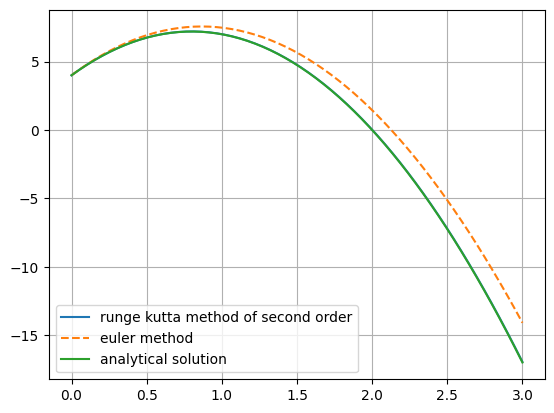

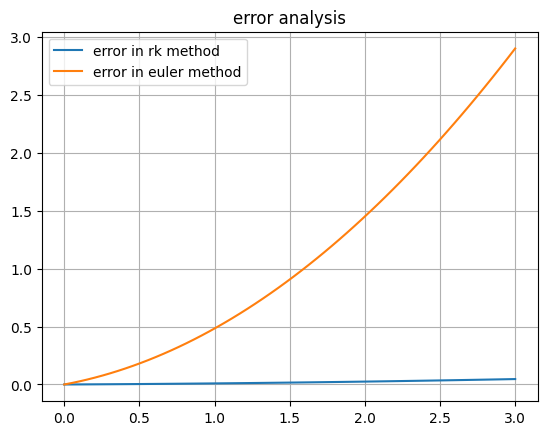

In [6]:
#question 7
#runge kutta method

import numpy as np
import matplotlib.pyplot as plt

inputt = input("enter the first derivative in x and y using python syntax : ")
derivative = lambda x,y :eval(inputt)

def RK2(fxn,x0,xend,y0,steps):
    x = np.linspace(x0,xend,steps)
    y = np.zeros(steps)
    h = (xend - x0)/(steps-1)
    y[0] = y0
    for i in range(steps - 1):
        k1 = fxn(x[i], y[i])
        x_mid = x[i] + h / 2
        y_mid = y[i] + (h / 2) * k1  # Midpoint for RK2
        k2 = fxn(x_mid, y_mid)
        y[i + 1] = y[i] + h * k2  # Update y using k2
    return x, y

def Eul(fxn,x0,xend,y0,steps):
    x = np.linspace(x0,xend,steps)
    y = np.zeros(steps)
    h = (xend - x0)/(steps-1)
    y[0] = y0
    for i in range(steps-1):
        y[i+1] = y[i] + h*fxn(x[i],y[i])
    return x,y

x,y = RK2(derivative,0,3,4,60)
x0,y0 = Eul(derivative,0,3,4,60)

y_analytical= lambda x:-5*x**2 + 8*x +4


plt.figure()
plt.plot(x,y,label='runge kutta method of second order')
plt.plot(x0,y0,label='euler method',linestyle='--')
plt.plot(x,y_analytical(x),label="analytical solution")
plt.legend()
plt.grid()
plt.show()

#error analysis

plt.title('error analysis')
plt.plot(x,abs(y-y_analytical(x)),label='error in rk method')
plt.plot(x,abs(y0-y_analytical(x)),label='error in euler method')
plt.legend()
plt.grid()
plt.show()

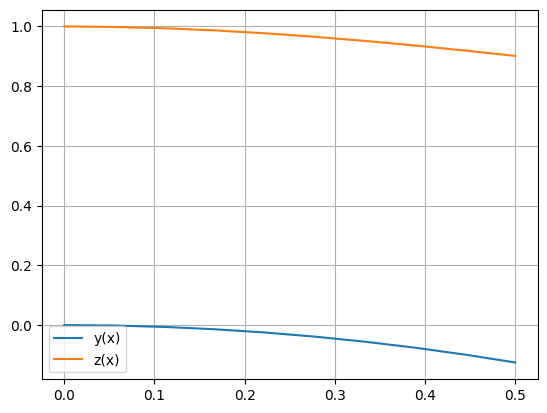

In [7]:
#question 8
F = [lambda x,y,z:-x-y*z,lambda x,y,z:-y-z*x]

def RK2(F,x0,xend,y0,z0,steps):
    x = np.linspace(x0,xend,steps)
    y = np.zeros(steps)
    z = np.zeros(steps)
    h = (xend - x0)/(steps-1)
    y[0] = y0
    z[0] = z0
    for i in range(steps - 1):
        k1 = F[0](x[i], y[i],z[i])
        x_mid = x[i] + h / 2
        y_mid = y[i] + (h / 2) * k1
        z_mid = z[i] + (h / 2) * k1
        k2 = F[0](x_mid, y_mid,z_mid)
        y[i + 1] = y[i] + h * k2
    for i in range(steps - 1):
        k1 = F[1](x[i], y[i],z[i])
        x_mid = x[i] + h / 2
        z_mid = z[i] + (h / 2) * k1
        y_mid = y[i] + (h / 2) * k1
        k2 = F[1](x_mid, y_mid, z_mid)
        z[i + 1] = z[i] + h * k2
    return x, y, z

x,y,z = RK2(F,0,0.5,0,1,10)
plt.figure()
plt.plot(x,y,label='y(x)')
plt.plot(x,z,label='z(x)')
plt.legend()
plt.grid()
plt.show()